In [ ]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1


In [ ]:
# Load data from a csv file
bcdf = pd.read_csv('cervical_cancer2.csv')

In [ ]:
# Reorder columsn so diagnosis is right-most
# First define a diagnosis series object
Biopsy = bcdf.Biopsy

In [ ]:
# Then drop diagnosis from dataframe
bcdf.drop('Biopsy', axis = 1, inplace = True)

In [ ]:
# Then append diagnsis to end of dataframe
bcdf['Biopsy'] = Biopsy

In [ ]:
# Take a quick glimpse of the dataset
bcdf.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Quick glimpse of tumor features (mean values) in relation to diagnosis
bcdf.groupby('Biopsy').mean()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Biopsy,,,,,,,,,,,,,,,,,,,,,
0,26.696139,2.449564,16.841843,2.120797,0.140722,1.136236,0.432121,0.554172,1.88023,0.092154,...,0.079701,0.471980,0.443337,0.014944,0.007472,0.014944,0.021171,0.012453,0.032379,0.032379
1,28.636364,2.472727,17.072727,2.218182,0.181818,2.150309,0.652967,0.654545,3.31800,0.163636,...,0.200000,1.036364,1.036364,0.109091,0.054545,0.109091,0.127273,0.454545,0.872727,0.327273


In [ ]:
# For visual comparisons of differential diagnosis...
# create to dataframes - one for benign, one for malignant tumor data

bcdf_n = bcdf[bcdf['Biopsy'] == 0]
bcdf_y = bcdf[bcdf['Biopsy'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

In [ ]:
outcome_count = bcdf.Biopsy.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['Biopsy']/sum(outcome_count['Biopsy'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(bcdf.Biopsy.value_counts()[1])/float((len(bcdf)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 6.410256410256411

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,Biopsy,Percent
Benign,803,94
Malignant,55,6


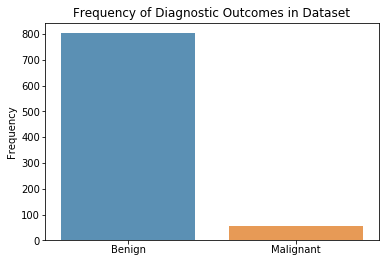

In [ ]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Biopsy', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

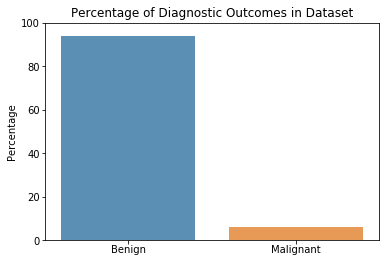

In [ ]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'Percent', data = outcome_count, alpha = .8)
plt.title('Percentage of Diagnostic Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

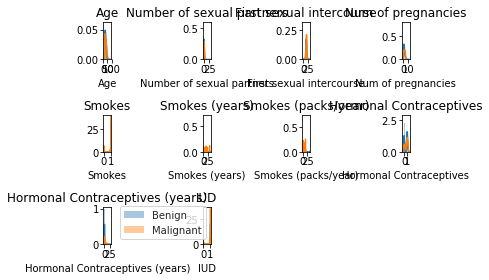

In [ ]:
# Instantiate a figure object for OOP figure manipulation.
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):

    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1

    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)

    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(bcdf_n[b], kde=True, label='Benign')
    sns.distplot(bcdf_y[b], kde=True, label='Malignant')

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

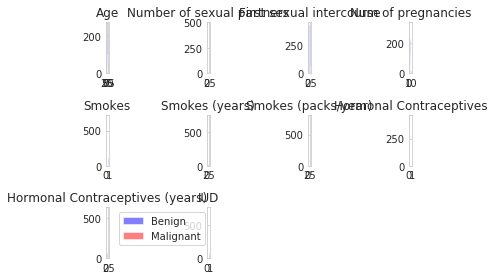

In [ ]:
# Visualize tumor characteristics for positive and negatives diagnoses


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):

    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1

    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)

    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

No handles with labels found to put in legend.


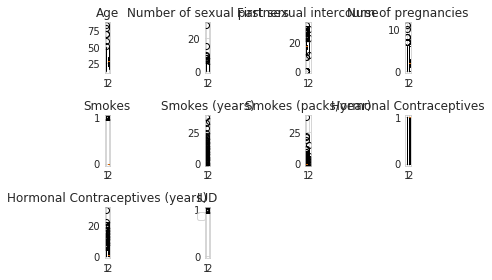

In [ ]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):

    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1

    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)

    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([bcdf_n[b], bcdf_y[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

/home/rachel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/rachel/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/rachel/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


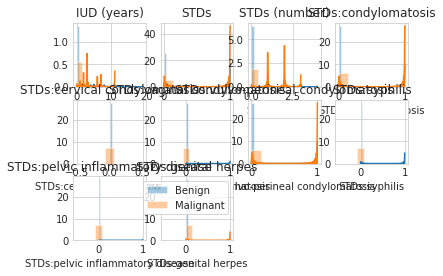

In [ ]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[10:20])):

    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1

    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)

    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(bcdf_n[b], kde=True, label='Benign')
    sns.distplot(bcdf_y[b], kde=True, label='Malignant')

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()


/home/rachel/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


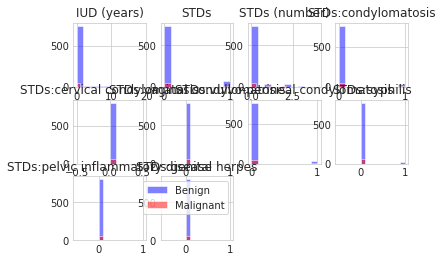

In [ ]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[10:20])):

    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1

    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)

    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

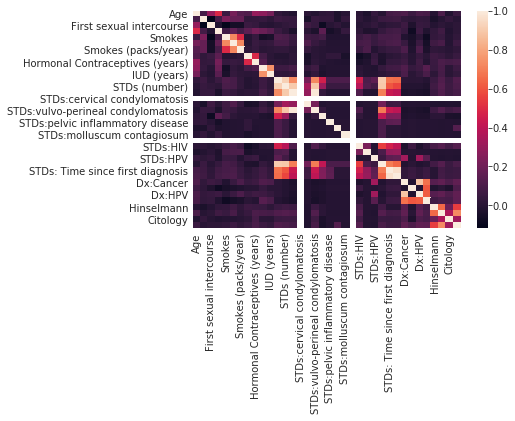

In [ ]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(bcdf.corr())
sns.set_style("whitegrid")
plt.show()

In [ ]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Biopsy'], train_size = .8 )

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
# The normalize features to account for feature scaling

# Instantiate
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20, 50], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy', 'gini'], 'max_depth':[10, 50, 100]}

In [ ]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))

In [ ]:
results = []
names = []


def estimator_function(parameter_dictionary, scoring = 'accuracy'):
    for name, model, params in models_opt:
        kfold = KFold(n_splits=3, random_state=2, shuffle=True)
        model_grid = GridSearchCV(model, params)
        cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [ ]:
estimator_function(models_opt,scoring = 'accuracy')


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/l

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are 

Cross Validation Accuracy LR: Accarcy: 0.930029 SD: 0.007132


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/pyth

Cross Validation Accuracy LDA: Accarcy: 0.950426 SD: 0.016886


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Accuracy KNN: Accarcy: 0.930029 SD: 0.007132


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' ins

Cross Validation Accuracy DTC: Accarcy: 0.950439 SD: 0.005428


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Cross Validation Accuracy RFC: Accarcy: 0.944610 SD: 0.007393


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWar

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/skle

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/skle

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/skle

Cross Validation Accuracy SVM: Accarcy: 0.941693 SD: 0.002002


In [ ]:
# Guassian Naive Bayes does not require optimization so we will run it separately without
# gridsearch and append the performance results to the results and names lists.

# Instantiate model
GNB =  GaussianNB()

# Define kfold - this was done above but not as a global variable
kfold = KFold(n_splits=3, random_state=2, shuffle=True)

# Run cross validation
cv_results_GNB= cross_val_score(GNB,X_train_norm, y_train, cv = kfold, scoring = scoring)

# Append results and names lists
results.append(cv_results_GNB)
names.append('GNB')

NameError: name 'scoring' is not defined

In [ ]:
# Ensemble Voting

from sklearn.ensemble import VotingClassifier

# Create list for estimatators
estimators = []

# Create estimator object
model1 = LogisticRegression()

# Append list with estimator name and object
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = GaussianNB()
estimators.append(("GB", model6))
model7 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model7))


voting = VotingClassifier(estimators)


results_voting = cross_val_score(voting, X_train_norm, y_train, cv=kfold)

results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))


/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/li

Accuracy: 0.9446104343829004 SD: 0.010872788942785469


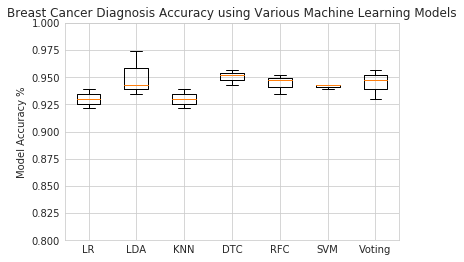

In [ ]:
 #Visualize model accuracies for comparision - boxplots will be appropriate to visualize
# data variation

plt.boxplot(results, labels = names)
plt.title('Breast Cancer Diagnosis Accuracy using Various Machine Learning Models')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.ylim(0.8,1)
plt.show()


In [ ]:
# Instantiate a new LDA model
lda_2 = LinearDiscriminantAnalysis()

# Fit LDA model to the entire training data
lda_2.fit(X_train_norm, y_train)

# Test LDA model on test data
lda_2_predicted = lda_2.predict(X_test_norm)

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
# Use sklearn's 'accuracy_score' method to check model accuracy during testing
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))



Linear discriminant model analyis Accuracy is: 0.9709302325581395


In [ ]:
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_test, lda_2_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )

print('Linear discriminant Model Confusion Matrix')
confusion_matrix_lda

Linear discriminant Model Confusion Matrix


,Predicted Negative,Predicted Postive
Actual Negative,160,5
Actual Positive,0,7


In [ ]:
print('Linear discriminant Model Classification Report')
print(classification_report(y_test, lda_2_predicted))

Linear discriminant Model Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       165
           1       0.58      1.00      0.74         7

   micro avg       0.97      0.97      0.97       172
   macro avg       0.79      0.98      0.86       172
weighted avg       0.98      0.97      0.97       172



In [ ]:
# Parameters
RF_params = {'n_estimators':[10,50,100, 200]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, y_train)

# Print best parameters
print('Optimized number of estimators: {}'.format(RFC_2_grid.best_params_.values()))



/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Optimized number of estimators: dict_values([50])


In [ ]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC

# Evalaute RFC with test data
RFC_3_predicted = RFC_3.predict(X_test_norm)
print('Model accuracy on test data: {}'.format(accuracy_score(y_test, RFC_3_predicted)))

Model accuracy on test data: 0.9709302325581395


In [ ]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(RFC_3.feature_importances_, bcdf.columns[:-1]), columns = ['Importance', 'Features'])

# Sort in descending order for easy organization and visualization
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

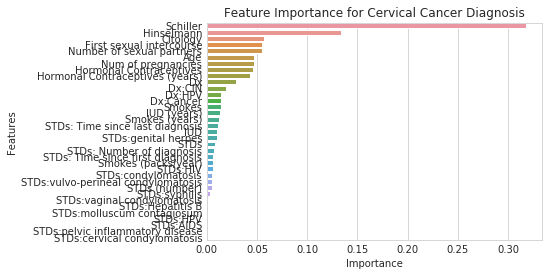

In [ ]:
# Visualize RFC feature importances
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Cervical Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

In [ ]:
rfc_features.Features[:5]


33                     Schiller
32                   Hinselmann
34                     Citology
2      First sexual intercourse
1     Number of sexual partners
Name: Features, dtype: object

In [ ]:
# Instantiate new logistic regression for use with scikit-learn's recursive feature elimination...
# with cross validation (RFECV)
lr_2 = LogisticRegression()

# Instantiate RFECV with logistic regression classifier
selector = RFECV(lr_2, cv = 10, scoring='accuracy')

# Fit RFECV to training data
selector.fit(X_train_norm, y_train)

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rachel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Logistic Regression Model Accuracy with Feature Elimination
Optimal number of features: 1


IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 35

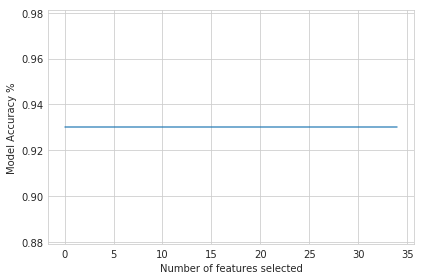

In [ ]:
#Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Model Accuracy %")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Logistic Regression Model Accuracy with Feature Elimination')
print('Optimal number of features: {}'.format(selector.n_features_))
print([i for i in list(bcdf.columns[selector.support_])])
plt.show()

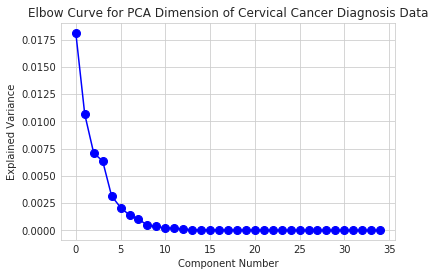

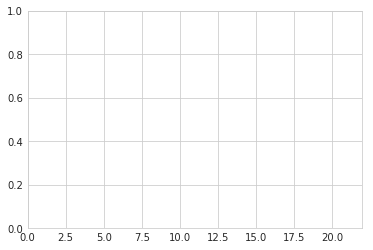

In [ ]:
# Instantiate PCA
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Cervical Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.savefig('Graph33.png',dpi=300,bbox_inches='tight')
plt.show();plt.xlim(0,22,2)
plt.show()

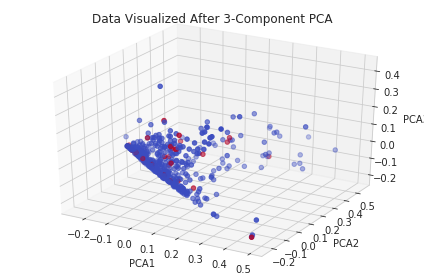

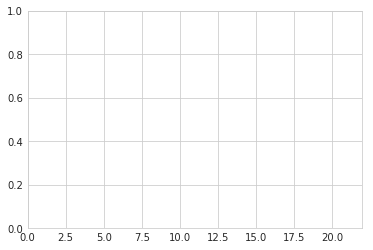

In [ ]:
#Instantiate new PCA object
pca = PCA(n_components=3)

# Fit and transform training data with PCA using 3 components
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)

# Create a dataframe of 3 PCA
pca_df = pd.DataFrame(X_train_norm_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Append diagnosis data into PCA dataframe
pca_df['Biopsy'] = y_train

# Visualize PCA in a 3D plot - color points by Biopsy to see if a visuale stratification occurs
pca_fig = plt.figure().gca(projection = '3d')
pca_fig.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['Biopsy'], cmap=cm.coolwarm)
pca_fig.set_xlabel('PCA1')
pca_fig.set_ylabel('PCA2')
pca_fig.set_zlabel('PCA3')
pca_fig.set_title('Data Visualized After 3-Component PCA')

sns.set_style("whitegrid")
plt.tight_layout()
plt.savefig('Graph44.png',dpi=300,bbox_inches='tight')
plt.show();plt.xlim(0,22,2)
plt.show()